## Importamos librerías

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics
from scipy import signal, stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['fft']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


## Leemos Datos

In [3]:
data = pd.read_csv("ERPdata.csv")
data.head()

,subject,condition,Fz,FCz,Cz,FC3,FC4,C3,C4,CP3,CP4,time_ms
0,1,1,5.533701,5.726507,5.469535,5.386723,4.588875,6.560092,4.542811,5.397492,5.103695,-1500.0000
1,1,1,5.651489,5.837326,5.773131,5.627975,4.822217,6.739976,4.811770,5.541357,5.379273,-1499.0234
2,1,1,5.717580,5.932924,5.948466,5.826460,4.979647,7.026199,5.053779,5.634972,5.600504,-1498.0469
3,1,1,5.703267,5.968103,5.851512,5.812192,4.992899,6.940671,5.106650,5.543577,5.589775,-1497.0703
4,1,1,5.571578,5.917541,5.812808,5.744715,4.963338,6.726491,5.158073,5.454069,5.614092,-1496.0938


## Individuo malito

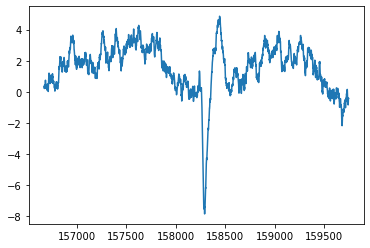

In [4]:
# subject 18: control; sensor: C4; condition: 1
fs = 1024 # Hz
erp_sub18_con1 = data.loc[(data['subject'] == 18) & (data['condition'] == 1), 'C4']
plt.plot(erp_sub18_con1)
plt.show()

## Individuo sanote

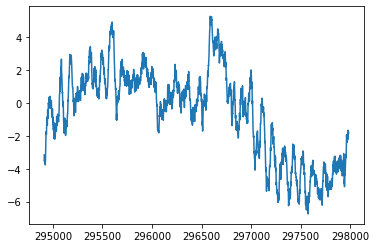

In [5]:
# subject 33: control; sensor: C4; condition: 1
fs = 1024 # Hz
erp_sub33_con1 = data.loc[(data['subject'] == 33) & (data['condition'] == 1), 'C4']
plt.plot(erp_sub33_con1)
plt.show()

## Obtén algún parámetro estadístico en el dominio natural que permita distinguir una señal de la otra

In [6]:
import statistics as stat
import numpy as np


p18=erp_sub18_con1.describe(percentiles=[0.1, 0.2, 0.3,0.4,0.5,0.6,0.7,0.8,0.9])
p33=erp_sub33_con1.describe(percentiles=[0.1, 0.2, 0.3,0.4,0.5,0.6,0.7,0.8,0.9])


a = np.matrix([['Moda',stat.mode(erp_sub18_con1),stat.mode(erp_sub33_con1)],
              ['Mediana',stat.median(erp_sub18_con1),stat.median(erp_sub33_con1)],
              ['Media',p18[1],p33[1]], 
              ['Variaza',stat.variance(erp_sub18_con1),stat.variance(erp_sub33_con1)],
              ['Desviación estandar',p18[2],p33[2]], 
              ['Asimetría',erp_sub18_con1.skew(),erp_sub33_con1.skew()],
              ['Curtosis',erp_sub18_con1.kurt(),erp_sub33_con1.kurt()] ,
              ['Rango intercuartil',erp_sub18_con1.describe()[4]-erp_sub18_con1.describe()[6],erp_sub33_con1.describe()[4]-erp_sub33_con1.describe()[6]],
              ['Min',p18[3],p33[3]],
              ['10%',p18[4],p33[4]],
              ['20%',p18[5],p33[5]],
              ['30%',p18[6],p33[6]],
              ['40%',p18[7],p33[7]],
              ['50%',p18[8],p33[8]],
              ['60%',p18[9],p33[9]],
              ['70%',p18[10],p33[10]], 
              ['80%',p18[11],p33[11]], 
              ['90%',p18[12],p33[12]], 
              ['Max',p18[13],p33[13]] 
              ])
df = pd.DataFrame(a, columns = ['Dato','Paciente 18','Paciente 33'])
display(df)




,Dato,Paciente 18,Paciente 33
0,Moda,0.320947368421053,-3.16182708333333
1,Mediana,1.7647378947368448,0.0441260416666667
2,Media,1.532220802837168,-0.6160112538655597
3,Variaza,2.552993987131861,7.323831204573043
4,Desviación estandar,1.5978091209940768,2.706257786053099
5,Asimetría,-1.734921505085244,-0.3346904395812969
6,Curtosis,6.8109281217345785,-0.8094919577086306
7,Rango intercuartil,-2.0854576315789495,-4.441232552083332
8,Min,-7.87006842105263,-6.74801770833333
9,10%,-0.16473294736842126,-4.755013437500003


Se puede observar que en los parematros obtenidos anteriormente, hay una variación con respecto a las 2 señales

## Obtén algún parámetro estadístico en el dominio frecuencial que permita distinguir una señal de la otra

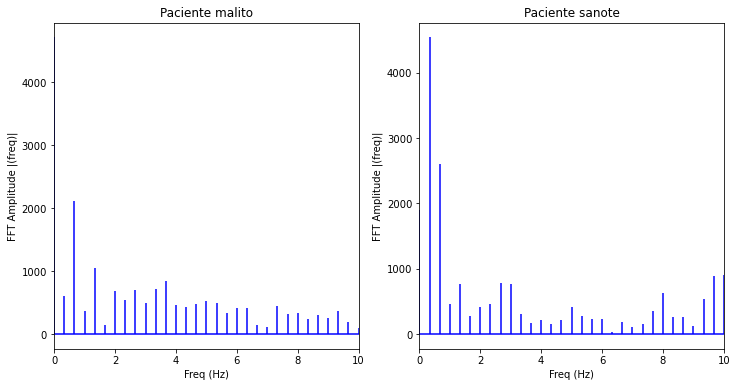

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


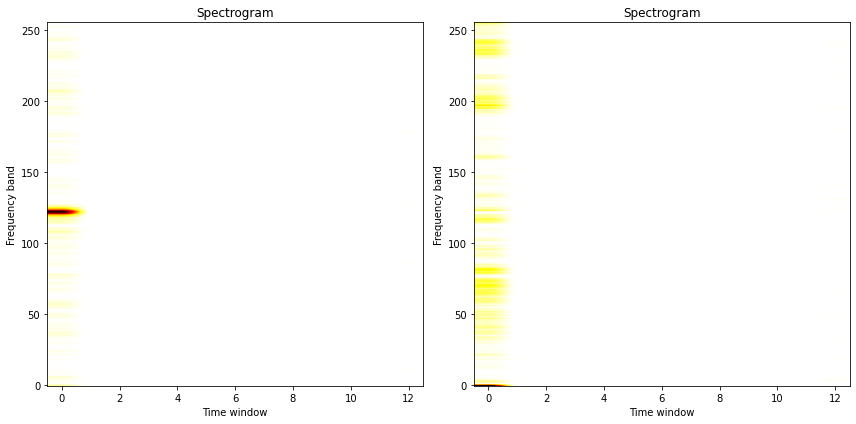

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1812: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


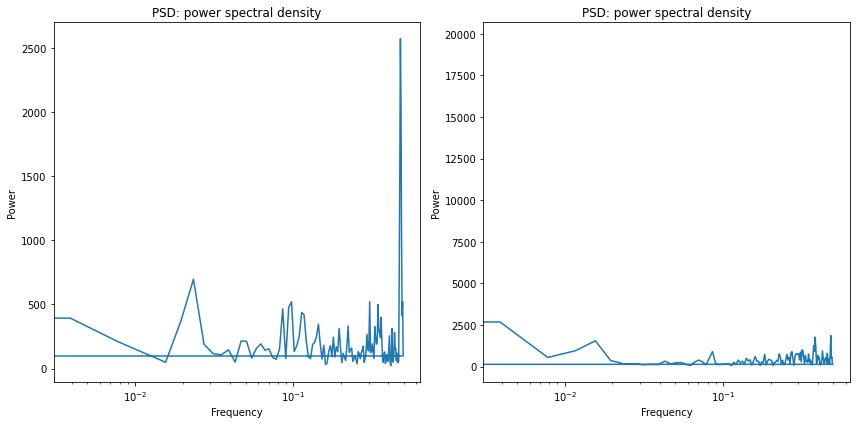

,Paciente 18,Paciente 33
count,3072.000000,3072.000000
mean,20.699660,25.914533
std,120.949025,151.634886
min,0.017045,0.111845
25%,1.767029,2.622503
50%,3.717031,6.533712
75%,9.572464,14.877073
max,4706.982306,4538.677067


In [18]:
from numpy.fft import fft, ifft

X = fft(erp_sub18_con1)
Y = fft(erp_sub33_con1)
N = len(X)
n = np.arange(N)
T = N/fs
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |(freq)|')
plt.xlim(0, 10)
plt.title('Paciente malito')
plt.subplot(122)
plt.stem(freq, np.abs(Y), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |(freq)|')
plt.xlim(0, 10)
plt.title('Paciente sanote')
plt.show()


plt.figure(figsize = (12, 6))
plt.subplot(121)
freqs, times, spectrogram = signal.spectrogram(X)

plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()
plt.subplot(122)
freqs, times, spectrogram = signal.spectrogram(Y)

plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()
plt.show()

plt.figure(figsize = (12, 6))
plt.subplot(121)
freqs, psd = signal.welch(X)

plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()

plt.subplot(122)
freqs, psd = signal.welch(Y)

plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()
plt.show()

X=(np.abs(X))
Y=(np.abs(Y))
a = np.matrix([X,Y])
df = pd.DataFrame(a.transpose(1, 0), columns = ['Paciente 18','Paciente 33'])
display(df.describe())

En el Espectrograma y en la PSD se pueden ver variaciones significativas de las dos señales, estos valores pueden servir para entrenar algoritmos y poder predecir cuando un paciente está sano o está enfermo